In [2]:
!pip install mysql-connector-python flask pandas matplotlib

In [4]:
import mysql.connector
import pandas as pd

# Step 1: Connect to the MySQL database
conn = mysql.connector.connect(
    host="localhost",  # Your MySQL server address
    user="root",  # Your MySQL username
    password="Smbk1234#",  # Your MySQL password
    database="ecommerce"  # The name of the database you created
)

# Step 2: Fetch data from the table
query = "SELECT * FROM customer_orders"
data = pd.read_sql_query(query, conn)

# Step 3: View the data
print(data.head())

# Step 4: Close the connection
conn.close()

# Total revenue
data['TotalPrice'] = data['Quantity'] * data['Price']
total_revenue = data['TotalPrice'].sum()
print(f"Total Revenue: ${total_revenue}")

# Most popular product
popular_product = data.groupby('Product')['Quantity'].sum().idxmax()
print(f"Most Popular Product: {popular_product}")

# Customer with the highest purchase
top_customer = data.groupby('CustomerName')['TotalPrice'].sum().idxmax()
print(f"Top Customer: {top_customer}")

   OrderID CustomerName   OrderDate     Product  Quantity   Price
0        1        Alice  2024-01-10      Laptop         1  1200.0
1        2          Bob  2024-02-15  Smartphone         2   800.0
2        3      Charlie  2024-03-05      Tablet         1   300.0
3        4        David  2024-04-12  Smartwatch         2   400.0
4        5          Eve  2024-05-09      Laptop         1  1200.0
Total Revenue: $16950.0
Most Popular Product: Headphones
Top Customer: Rachel


C:\Users\dell\AppData\Local\Temp\ipykernel_13584\1963095692.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [6]:
!pip install matplotlib seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

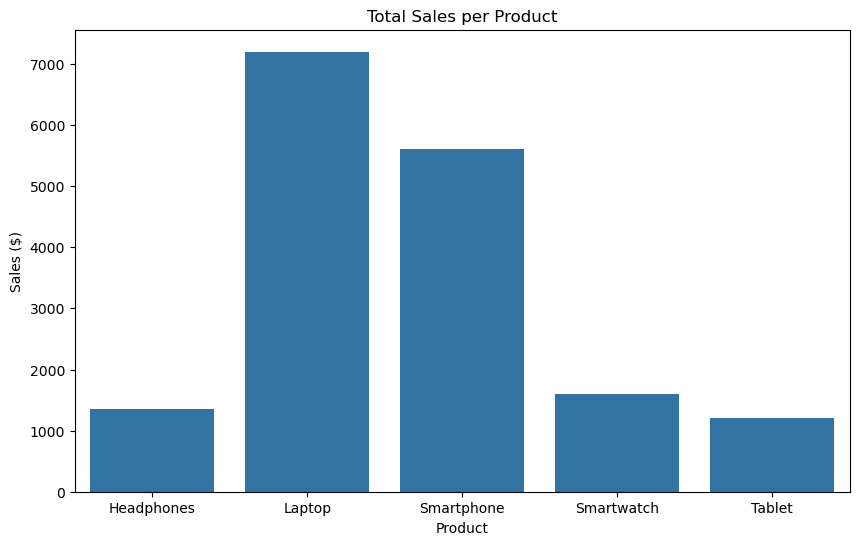

In [12]:
# Bar chart for total sales per product
product_sales = data.groupby('Product')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Product', y='TotalPrice', data=product_sales)
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.show()

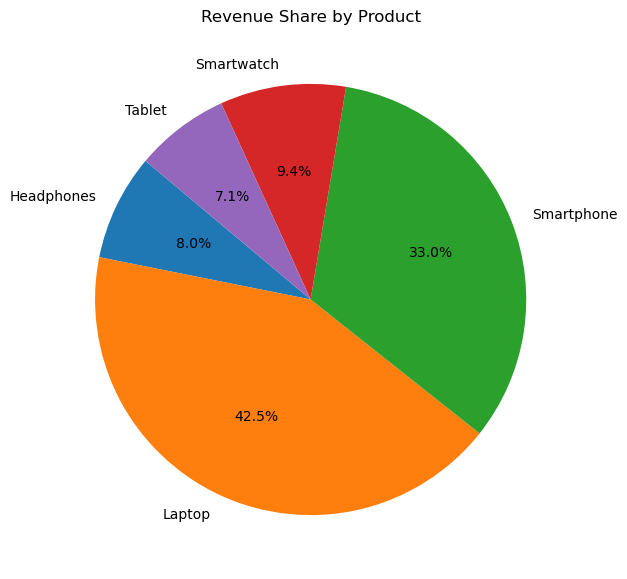

In [14]:
# Pie chart for revenue share by product
plt.figure(figsize=(7,7))
plt.pie(product_sales['TotalPrice'], labels=product_sales['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by Product')
plt.show()

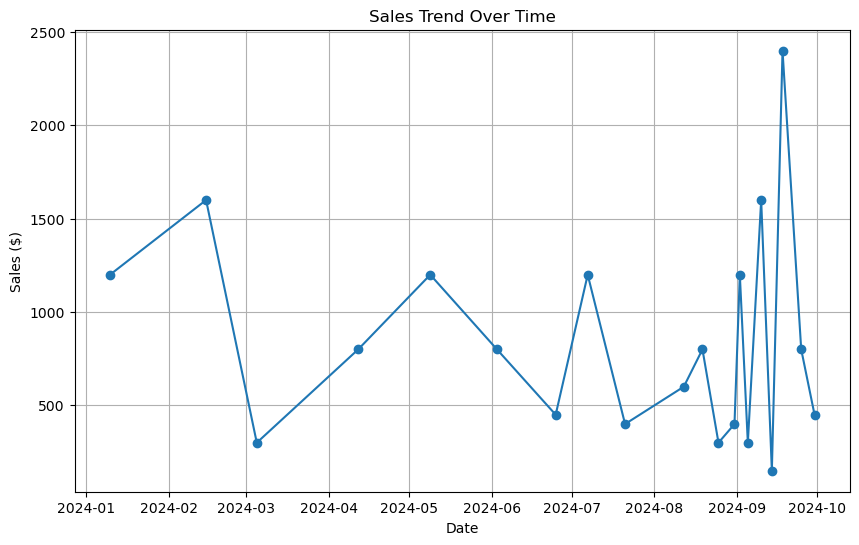

In [16]:
# Line chart for sales trend over time
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
sales_trend = data.groupby('OrderDate')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(sales_trend['OrderDate'], sales_trend['TotalPrice'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()